In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# set path to data file
notebook_dir = Path.cwd()
mover_file = notebook_dir / 'data' / 'SPX_index leavers & joiners_11-Nov-2025.xlsx'
returns_file = notebook_dir / 'data' / 'Daily_Prices.csv'

In [3]:
returns = pd.read_csv(returns_file, parse_dates=['Date'])

In [4]:
returns['Date'] = pd.to_datetime(returns['Date'], format='%Y-%m-%d')
returns = returns[returns['Date'] >= '1995-01-01']
returns.set_index(['Date'], inplace=True)
returns

,A.N,AA.N,AABA.OQ^J19,AAL.N^B97,AAL.OQ,AAP.N,AAPL.OQ,ABBV.N,ABI.N^K08,ABK.N^K10,...,YNR.N^J00,YUM.N,YUMC.N,ZBH.N,ZBRA.OQ,ZE.N^E98,ZIMV.OQ^J25,ZION.OQ,ZRN.N^F98,ZTS.N
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-03,NaN,NaN,NaN,19.125,NaN,NaN,0.342634,NaN,6.56250,12.166667,...,NaN,NaN,NaN,NaN,8.333337,11.750,NaN,9.062500,18.125,NaN
1995-01-04,NaN,NaN,NaN,19.000,NaN,NaN,0.351562,NaN,6.46875,12.333333,...,NaN,NaN,NaN,NaN,8.222226,11.375,NaN,8.890625,18.000,NaN
1995-01-05,NaN,NaN,NaN,18.625,NaN,NaN,0.347098,NaN,6.53125,12.333333,...,NaN,NaN,NaN,NaN,8.222226,11.000,NaN,8.968750,18.375,NaN
1995-01-06,NaN,NaN,NaN,18.750,NaN,NaN,0.375000,NaN,6.46875,12.250000,...,NaN,NaN,NaN,NaN,8.222226,10.875,NaN,8.968750,18.625,NaN
1995-01-09,NaN,NaN,NaN,18.750,NaN,NaN,0.367885,NaN,6.53125,12.333333,...,NaN,NaN,NaN,NaN,8.305559,10.750,NaN,9.062500,19.125,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,136.10,38.61,NaN,NaN,17.35,43.73,258.200000,180.00,NaN,NaN,...,NaN,135.00,50.42,107.30,395.440000,NaN,13.85,54.970000,NaN,164.70
2024-12-26,135.83,38.35,NaN,NaN,17.35,44.24,259.020000,179.20,NaN,NaN,...,NaN,136.00,49.79,107.25,396.850000,NaN,14.11,55.350000,NaN,165.52
2024-12-27,135.54,37.68,NaN,NaN,17.35,44.06,255.590000,178.01,NaN,NaN,...,NaN,135.23,49.10,106.87,389.070000,NaN,14.04,54.680000,NaN,164.60


In [5]:
movers = pd.read_excel(mover_file, header=None)
movers.columns = ['Status', 'Issuer', 'Code', 'Date']
display(movers.head())

,Status,Issuer,Code,Date
0,Leaver,Eastman Chemical,EMN.N,2025-11-04
1,Joiner,Qnity Electronic,Q.N,2025-11-03
2,Leaver,Carmax,KMX.N,2025-10-31
3,Joiner,Solstice Advance,SOLS.OQ,2025-10-30
4,Joiner,Applovin,APP.OQ,2025-09-22


In [6]:
movers['Date'] = pd.to_datetime(movers['Date'])
movers.sort_values(by='Date', inplace=True)
display(movers.head(5))

,Status,Issuer,Code,Date
2120,Joiner,eSystems,ESY.N^E95 (expired),1994-12-30
1789,Joiner,Ecolab,ECL.N,1994-12-30
1790,Joiner,Edison Intl,EIX.N,1994-12-30
1791,Joiner,El Paso CGP,CGP.N^A01 (expired),1994-12-30
1792,Joiner,Emerson Electric,EMR.N,1994-12-30


In [7]:
unique_codes = movers['Code'].unique()
unique_codes = [t.replace("(expired)", "").strip() for t in unique_codes]


In [8]:
december_1994_data = movers[movers['Date'].dt.to_period('M') == '1994-12']
current_sp500_composition = set(december_1994_data['Code'])
print(f"Size of the initial S&P 500 composition set: {len(current_sp500_composition)}")

Size of the initial S&P 500 composition set: 483


In [9]:
sp500_composition_over_time = {}

for index, row in movers.iterrows():
    date = row['Date']
    status = row['Status']
    code = row['Code']
    code = code.replace("(expired)", "").strip()

    if status == 'Joiner':
        current_sp500_composition.add(code)
    elif status == 'Leaver':
        try:
            current_sp500_composition.remove(code)
        except KeyError:
            # Handle cases where a leaver is not found in the current composition
            pass

    # Optionally store the composition at this date
    sp500_composition_over_time[date] = set(current_sp500_composition)

print(f"Number of dates with composition changes recorded: {len(sp500_composition_over_time)}")

Number of dates with composition changes recorded: 742


In [10]:
dates = sorted(sp500_composition_over_time.keys())
unique_months = sorted(list(set(date.to_period('M') for date in dates)))

monthly_sp500_composition = {}

for month in unique_months:
    latest_date_in_month = None
    for date in dates:
        if date.to_period('M') == month:
            latest_date_in_month = date

    if latest_date_in_month is not None:
        monthly_sp500_composition[month] = sp500_composition_over_time[latest_date_in_month]

print(f"Number of months with recorded composition: {len(monthly_sp500_composition)}")

Number of months with recorded composition: 309


In [11]:
all_codes = sorted(list(unique_codes))
# Generate all months from the first date in the data to the last date
start_month = movers['Date'].min().to_period('M')
end_month = movers['Date'].max().to_period('M')
all_months = pd.period_range(start=start_month, end=end_month, freq='M').tolist()


data = []
current_composition = set(december_1994_data['Code']) # Initialize with the December 1994 composition

# Recreate the sp500_composition_over_time dictionary with daily compositions
sp500_composition_over_time = {}
for index, row in movers.iterrows():
    date = row['Date']
    status = row['Status']
    code = row['Code']
    code = code.replace("(expired)", "").strip()

    if status == 'Joiner':
        current_composition.add(code)
    elif status == 'Leaver':
        try:
            current_composition.remove(code)
        except KeyError:
            pass # Handle cases where a leaver is not found in the current composition

    sp500_composition_over_time[date] = set(current_composition)


# Iterate through all months and find the latest composition for each
monthly_sp500_composition = {}
dates_with_composition = sorted(sp500_composition_over_time.keys())

for month in all_months:
    latest_date_in_month = None
    # Find the latest date in sp500_composition_over_time that is in the current month
    for date in reversed(dates_with_composition): # Iterate in reverse to find the latest date quickly
        if date.to_period('M') == month:
            latest_date_in_month = date
            break

    # If a date with composition is found in the month, use its composition
    if latest_date_in_month is not None:
        monthly_sp500_composition[month] = sp500_composition_over_time[latest_date_in_month]
    else:
        # If no date with composition change in the current month,
        # use the composition from the previous month's last recorded change.
        # This assumes the composition remains unchanged unless a joiner/leaver occurs.
        previous_month_composition = None
        for date in reversed(dates_with_composition):
             if date < month.start_time:
                previous_month_composition = sp500_composition_over_time[date]
                break
        if previous_month_composition is not None:
             monthly_sp500_composition[month] = previous_month_composition
        else:
            # This case should ideally not happen if the data starts in Dec 1994
            # but as a fallback, use the initial composition
             monthly_sp500_composition[month] = set(december_1994_data['Code'])


data = []
for month in all_months:
    month_data = {'Month': month.to_timestamp()}
    current_month_composition = monthly_sp500_composition.get(month, set())
    for code in all_codes:
        month_data[code] = 1 if code in current_month_composition else 0
    data.append(month_data)


sp500_composition_df = pd.DataFrame(data)
sp500_composition_df.set_index('Month', inplace=True)
display(sp500_composition_df.head())

,A.N,AA.N,AABA.OQ^J19,AAL.N^B97,AAL.OQ,AAP.N,AAPL.OQ,ABBV.N,ABI.N^K08,ABK.N^K10,...,YNR.N^J00,YUM.N,YUMC.N,ZBH.N,ZBRA.OQ,ZE.N^E98,ZIMV.OQ^J25,ZION.OQ,ZRN.N^F98,ZTS.N
Month,,,,,,,,,,,,,,,,,,,,,
1994-12-01,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1995-01-01,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1995-02-01,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1995-03-01,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1995-04-01,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


Check which stocks are part of the index at the end of the training period. These stocks will be considered for training and testing. We get all available return data for these stocks in the 4 years of the study period (also if they later joined S&P500, we get their price data for the whole training period). Also, if companies leave S&P500, we still use them in the test set as long as we have price data available.

In [12]:
i = 0
study_periods_folder = notebook_dir / 'data' / 'study_periods'
for year in range(1997, 2024):
    i += 1
    study_period_series = []  # Collect series here
    closest_date = sp500_composition_df.index.get_indexer([pd.Timestamp(f'{year}-12-01')], method='nearest')[0]
    study_period_stocks = sp500_composition_df.iloc[closest_date]
    # only keep 1s
    study_period_stocks = study_period_stocks[study_period_stocks == 1] 
    study_period_stocks = study_period_stocks.index.tolist()
    # get returns for each constituent for the last 3 years and current year
    for stock in study_period_stocks:
        try:
            stock_returns = returns[stock][f'{year-2}-01-01':f'{year+1}-12-31']
            study_period_series.append(stock_returns.rename(stock))  # Rename to stock ticker
        except KeyError:
            continue
    # Concat all series at once
    study_period = pd.concat(study_period_series, axis=1)
    study_period.to_csv(study_periods_folder / f'test_{year+1}.csv')

print(f"Generated {i} study periods.")

Generated 27 study periods.


### Save returns with next script

In [ ]:
# from datetime import datetime
# from dateutil.relativedelta import relativedelta

# returns_folder = notebook_dir / 'data' / 'returns_per_period'

# def get_returns_for_date(returns_df, target_date):
#     target_date = pd.to_datetime(target_date)
#     if target_date not in returns_df.index:
#         raise ValueError(f"No data available for the date: {target_date}")
#     else:
#         return returns_df.loc[target_date]

# for year in range(1998, 2025):
#     data = pd.read_csv(study_periods_folder / f'test_{year}.csv')
#     data['Date'] = pd.to_datetime(data['Date'])
#     data.set_index('Date', inplace=True)

#     missing_value_stocks = data.columns[data.isna().sum(axis=0) > 0]
#     for stock in missing_value_stocks:
#         if data[stock].isna().sum() == len(data):
#             data.drop(columns=stock, inplace=True)

#     returns_data = data.pct_change(fill_method=None)
#     returns_data = returns_data[1:]

#     ### Standardize return data
#     start_date = returns_data.index.min().year
#     end_date = start_date + 2
#     start_date = f'{start_date}-01-01'
#     end_date = f'{end_date}-12-31'
#     # Only use returns from training period to compute mean and std
#     returns_3years = returns_data[f'{start_date}':f'{end_date}']
#     mean_return = returns_3years.mean().mean()
#     mean_volatility = returns_3years.std().mean()
#     returns_data = (returns_data - mean_return) / mean_volatility

#     stacked_returns = returns_data.T.stack().reset_index()
#     stacked_returns.columns = ['stock', 'date', 'return']

#     window = 240

#     sequences = []
#     for stock, group in stacked_returns.groupby('stock'):
#         group = group.sort_values('date')
#         vals = group['return'].values
#         for i in range(window, len(vals)):
#             seq = vals[i-window:i]
#             sequences.append({
#                 'stock': stock,
#                 'date': group['date'].iloc[i],
#                 'return': vals[i],
#                 'sequence': seq
#             })

#     sequences_df = pd.DataFrame(sequences)

#     end = (datetime.strptime(end_date, '%Y-%m-%d') + relativedelta(years=1)).strftime('%Y-%m-%d')

#     valid_days = returns_data.loc[
#         (returns_data.index >= start_date) & 
#         (returns_data.index <= end)
#     ].index

#     sequences_df['Class0'] = 0
#     sequences_df['Class1'] = 0

#     for date in valid_days:
#         current = date.strftime('%Y-%m-%d')
#         returns_on_date = get_returns_for_date(returns_data, current)
#         median_return = returns_on_date.median()

#         below_median = returns_on_date[returns_on_date < median_return].index
#         above_median = returns_on_date[returns_on_date >= median_return].index

#         mask = sequences_df['date'] == current

#         sequences_df.loc[
#             mask & sequences_df['stock'].isin(below_median),
#             'Class0'
#         ] = 1

#         sequences_df.loc[
#             mask & sequences_df['stock'].isin(above_median),
#             'Class1'
#         ] = 1

#     sequences_df.to_parquet(returns_folder / f'returns_{year}.parquet', engine='pyarrow', index=False)
#     print(f"Saved returns_{year}.parquet with {len(sequences_df)} sequences.")

Saved returns_1998.parquet with 356304 sequences.
Saved returns_1999.parquet with 355228 sequences.
Saved returns_2000.parquet with 358779 sequences.
Saved returns_2001.parquet with 361803 sequences.
Saved returns_2002.parquet with 370207 sequences.
Saved returns_2003.parquet with 374177 sequences.
Saved returns_2004.parquet with 377008 sequences.
Saved returns_2005.parquet with 379567 sequences.
Saved returns_2006.parquet with 376862 sequences.
Saved returns_2007.parquet with 373194 sequences.
Saved returns_2008.parquet with 374079 sequences.
Saved returns_2009.parquet with 374142 sequences.
Saved returns_2010.parquet with 376847 sequences.
Saved returns_2011.parquet with 379213 sequences.
Saved returns_2012.parquet with 376715 sequences.
Saved returns_2013.parquet with 375572 sequences.
Saved returns_2014.parquet with 375098 sequences.
Saved returns_2015.parquet with 377816 sequences.
Saved returns_2016.parquet with 376327 sequences.
Saved returns_2017.parquet with 380632 sequences.


### Process sequences one by one

In [13]:
data = pd.read_csv(study_periods_folder / 'test_2005.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [14]:
missing_value_stocks = data.columns[data.isna().sum(axis=0) > 0]
# print number of na values for stocks with missing values
for stock in missing_value_stocks:
    print(f"{stock}: {data[stock].isna().sum()} missing values")
    if data[stock].isna().sum() == len(data):
        # delete column
        data.drop(columns=stock, inplace=True)
        print('Deleted column:', stock)

AMCR.N: 1008 missing values
Deleted column: AMCR.N
CIT.N^K09: 125 missing values
CPN.N^L05: 18 missing values
DAL.N^J05: 55 missing values
DPH.N^J05: 57 missing values
FSLb.N^L06: 729 missing values
G.N^J05: 63 missing values
GENZ.OQ^D11: 1 missing values
GILD.OQ: 1 missing values
GLK.N^G05: 126 missing values
GP.N^L05: 5 missing values
HSP.N^I15: 578 missing values
MAY.N^H05: 86 missing values
MEDI.OQ^F07: 1 missing values
MHS.N^D12: 411 missing values
NXTL.OQ^H05: 97 missing values
PVN.N^J05: 63 missing values
RF.N: 84 missing values
S.N^C05: 195 missing values
SDS.N^H05: 98 missing values
SOV.N^A09: 1 missing values
T.N^K05: 28 missing values
TFCFA.OQ^C19: 1 missing values
TOY.N^G05: 113 missing values
UCL.N^H05: 99 missing values
VRTS.OQ^G05: 126 missing values


NOTE: If missing values are >250, they cannot occur at the very end. For stocks with missing values, either only 1000 - #NA sequences are created (if missing at the beginning) or only #days_of_year - #NA predictions will be generated (if missing at the end)

In [15]:
# create returns out of the prices
returns_data = data.pct_change()
returns_data = returns_data[1:]
returns_data

C:\Users\jdobe\AppData\Local\Temp\ipykernel_25056\4225891145.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_data = data.pct_change()


,A.N,AABA.OQ^J19,AAPL.OQ,ABI.N^K08,ABK.N^K10,ABS.N^F06,ABT.N,ACS.N^B10,ACV.N^K06,ADBE.OQ,...,X.N^F25,XEL.OQ,XL.N^I18,XLNX.OQ^B22,XOM.N,XRX.OQ,XTO.N^F10,YUM.N,ZBH.N,ZION.OQ
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-03,0.063248,0.026838,0.012017,-0.051053,-0.007031,-0.002534,0.000895,-0.021382,0.003868,0.038945,...,0.036000,0.004608,0.006637,0.097473,0.001515,-0.001919,-0.020649,0.021046,-0.006285,0.016479
2002-01-04,0.054019,-0.012023,0.004664,0.046866,0.007427,0.011115,-0.001789,0.017188,-0.005213,0.085248,...,0.017650,-0.007763,-0.009341,0.002412,0.008573,-0.033654,0.015060,0.038775,-0.016312,0.008392
2002-01-07,-0.003966,0.043915,-0.033347,-0.009272,-0.007543,-0.016960,-0.006990,-0.007160,-0.010025,0.007242,...,-0.002710,0.007112,-0.014975,-0.023846,-0.008750,-0.016915,-0.014243,0.018664,0.000000,-0.000567
2002-01-08,0.003063,-0.010137,-0.012662,-0.050802,-0.012956,-0.021406,-0.006498,0.017308,-0.007135,0.013274,...,0.000543,-0.010593,-0.004392,0.006948,0.001261,0.002024,-0.007827,0.019286,0.032149,-0.001703
2002-01-09,-0.023817,0.036866,-0.042459,0.021127,0.010326,-0.007835,-0.005451,0.020605,0.010431,0.027020,...,-0.011950,-0.003212,0.008031,-0.008680,-0.011587,-0.014141,-0.026092,0.000946,0.006557,-0.004550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-12-23,-0.004847,-0.005143,-0.009052,-0.011940,0.007436,-0.117698,0.002946,0.050275,0.004354,-0.009079,...,0.019532,-0.002644,0.001795,-0.006526,-0.000175,-0.001343,-0.006041,-0.002478,-0.006612,-0.004294
2005-12-27,-0.026361,-0.016741,0.011997,-0.003021,-0.005981,0.013632,-0.011258,-0.021639,-0.011706,-0.004581,...,0.000211,-0.002651,0.000597,-0.015070,-0.021370,-0.011432,-0.048405,-0.018219,-0.011576,-0.003006
2005-12-28,-0.002354,0.007261,-0.008892,0.013258,-0.006657,0.013449,-0.001238,-0.003854,0.012064,-0.001895,...,0.012208,0.003721,-0.005521,-0.001569,0.006802,-0.001361,0.014827,0.002320,0.003221,0.003408


In [16]:
# Only use data from first 3 years for normalization
start_date = returns_data.index.min().year
end_date = start_date + 2
start_date = f'{start_date}-01-01'
end_date = f'{end_date}-12-31'

returns_3years = returns_data[f'{start_date}':f'{end_date}']
mean_return = returns_3years.mean().mean()
mean_volatility = returns_3years.std().mean()
returns_data = (returns_data - mean_return) / mean_volatility

In [17]:
# stack returns in one large vector
stacked_returns = returns_data.T.stack().reset_index()
stacked_returns.columns = ['stock', 'date', 'return']
stacked_returns

,stock,date,return
0,A.N,2002-01-03,2.751341
1,A.N,2002-01-04,2.346499
2,A.N,2002-01-07,-0.197216
3,A.N,2002-01-08,0.111122
4,A.N,2002-01-09,-1.068045
...,...,...,...
500561,ZION.OQ,2005-12-23,-0.211614
500562,ZION.OQ,2005-12-27,-0.155097
500563,ZION.OQ,2005-12-28,0.126266
500564,ZION.OQ,2005-12-29,-0.028970


In [18]:
window = 240  # number of past days in each sequence

# Group by stock and create rolling windows
sequences = []

for stock, group in stacked_returns.groupby('stock'):
    group = group.sort_values(by='date')
    vals = group['return'].values
    
    # create rolling sequences of length 240
    for i in range(window, len(vals)):
        seq = vals[i-window:i]  # past 240 returns
        sequences.append({
            'stock': stock,
            'date': group['date'].iloc[i],  # the "current" date (t)
            'return': vals[i],  # the return at time t
            'sequence': seq
        })

# Convert to DataFrame
sequences_df = pd.DataFrame(sequences)

## Targets
for each date, get the returns for all stocks and create two targets: below median and above median return


In [19]:
# get returns for all stocks for a specific date (day)
def get_returns_for_date(returns_df, target_date):
    """
    Get returns for all stocks for a specific date.

    Parameters:
    returns_df (pd.DataFrame): DataFrame with Date as index and stock tickers as columns.
    target_date (str or pd.Timestamp): The date for which to retrieve returns.

    Returns:
    pd.Series: Series with stock tickers as index and their returns on the target date.
    """
    target_date = pd.to_datetime(target_date)
    if target_date not in returns_df.index:
        raise ValueError(f"No data available for the date: {target_date}")
    else:
        return returns_df.loc[target_date]

In [20]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

end = (datetime.strptime(end_date, '%Y-%m-%d') + relativedelta(years=1)).strftime('%Y-%m-%d')

valid_days = returns_data.loc[
    (returns_data.index >= start_date) & 
    (returns_data.index <= end)
].index

# Initialize target columns with 0 (integer type)
sequences_df['Class0'] = 0
sequences_df['Class1'] = 0

for date in valid_days:
    current = date.strftime('%Y-%m-%d')
    returns_on_date = get_returns_for_date(returns_data, current)
    # compute median return
    median_return = returns_on_date.median()
    # create two targets: below median and above median
    below_median = returns_on_date[returns_on_date < median_return].index
    above_median = returns_on_date[returns_on_date >= median_return].index
    # add these results to the sequences_df
    mask_current_date = sequences_df['date'] == current

    sequences_df.loc[
        mask_current_date & sequences_df['stock'].isin(below_median),
        'Class0'
    ] = 1

    sequences_df.loc[
        mask_current_date & sequences_df['stock'].isin(above_median),
        'Class1'
    ] = 1

In [23]:
sequences_df

,stock,date,return,sequence,Class0,Class1
0,A.N,2002-12-16,1.047966,"[2.751340814173155, 2.346498562902601, -0.1972...",0,1
1,A.N,2002-12-17,-0.570973,"[2.346498562902601, -0.1972157281097782, 0.111...",1,0
2,A.N,2002-12-18,-1.409884,"[-0.1972157281097782, 0.11112174905803858, -1....",1,0
3,A.N,2002-12-19,-0.257550,"[0.11112174905803858, -1.068044863472268, -0.3...",0,1
4,A.N,2002-12-20,3.222392,"[-1.068044863472268, -0.36628133053841244, -0....",0,1
...,...,...,...,...,...,...
380801,ZION.OQ,2005-12-23,-0.211614,"[-0.43448433942633674, -0.5336532728796121, -0...",1,0
380802,ZION.OQ,2005-12-27,-0.155097,"[-0.5336532728796121, -0.12652402241306784, 1....",0,1
380803,ZION.OQ,2005-12-28,0.126266,"[-0.12652402241306784, 1.8954834738099555, -0....",0,1
380804,ZION.OQ,2005-12-29,-0.028970,"[1.8954834738099555, -0.04969017332557178, -0....",0,1


In [24]:
sequences_df['Class0'].sum(), sequences_df['Class1'].sum()

(np.int64(189992), np.int64(190814))

In [25]:
sequences_df.isna().sum()

stock       0
date        0
return      0
sequence    0
Class0      0
Class1      0
dtype: int64

## LSTM Network

- the use RMSprop instead of adam
- recurrent dropout = 0.1
- 80% of training samples as training set and 20% as validation set
- early stopping, with patience = 10, while max epochs = 1000
- 1 input with 240 lags
- 1 LSTM layer with h = 25
- dense output layer with 2 neurons and softmax activation function

Forecasting goal: probability for each stock to under/outperform the cross-sectional median at t+1 with information up to point t. Stocks are ranked in descending order for this probability for each of the 2 targets.

In [1]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [26]:
# Prepare the data
X = np.array(sequences_df['sequence'].tolist())
X = X.reshape(X.shape[0], 240, 1)
y = sequences_df[['Class0', 'Class1']].values
y = np.argmax(y, axis=1)

# Split based on year: 2005 for test, earlier years for train/val
test_mask = sequences_df['date'].dt.year == 2005
X_test = X[test_mask.values]
y_test = y[test_mask.values]
X_train_val = X[~test_mask.values]
y_train_val = y[~test_mask.values]

# Keep the metadata for test set (stock, date, return)
test_metadata = sequences_df[test_mask][['stock', 'date', 'return']].reset_index(drop=True)

# Split train_val into train and val (80% train, 20% val of the train_val set)
X_train = X_train_val[:int(0.8 * len(X_train_val))]
y_train = y_train_val[:int(0.8 * len(y_train_val))]
X_val = X_train_val[int(0.8 * len(X_train_val)):]
y_val = y_train_val[int(0.8 * len(y_train_val)):]

In [28]:
# Build the LSTM model using pure PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=25, num_classes=2, dropout=0.1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        # Take the last output
        last_output = lstm_out[:, -1, :]
        out = self.fc(last_output)
        return out

# Initialize model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

model = LSTMModel().to(device)
print(model)

Using device: cpu
LSTMModel(
  (lstm): LSTM(1, 25, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=25, out_features=2, bias=True)
)


In [30]:
# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
X_val_tensor = torch.FloatTensor(X_val).to(device)
y_val_tensor = torch.LongTensor(y_val).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler - reduces LR when validation loss plateaus
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min',           # minimize validation loss
    factor=0.5,           # reduce LR by half
    patience=5,           # wait 5 epochs before reducing
    verbose=True,         # print when LR is reduced
    min_lr=1e-6          # minimum learning rate
)

# Training loop with early stopping
best_val_loss = float('inf')
patience = 10
patience_counter = 0
max_epochs = 100

for epoch in range(max_epochs):
    # Training phase
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    
    for batch_X, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    
    # Validation phase
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for batch_X, labels in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    train_acc = train_correct / train_total
    val_acc = val_correct / val_total
    
    # Step the learning rate scheduler
    scheduler.step(val_loss)
    current_lr = optimizer.param_groups[0]['lr']
    
    print(f'Epoch {epoch+1}/{max_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, LR: {current_lr:.6f}')
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # Save best model
        torch.save(model.state_dict(), 'output/best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

# Load best model
model.load_state_dict(torch.load('output/best_model.pth'))
print('Training complete!')

Epoch 1/100 - Train Loss: 0.6931, Train Acc: 0.5045, Val Loss: 0.6931, Val Acc: 0.5059
Epoch 2/100 - Train Loss: 0.6931, Train Acc: 0.5046, Val Loss: 0.6931, Val Acc: 0.5011
Epoch 3/100 - Train Loss: 0.6931, Train Acc: 0.5043, Val Loss: 0.6930, Val Acc: 0.5074
Epoch 4/100 - Train Loss: 0.6930, Train Acc: 0.5052, Val Loss: 0.6930, Val Acc: 0.5077
Epoch 5/100 - Train Loss: 0.6930, Train Acc: 0.5059, Val Loss: 0.6930, Val Acc: 0.5079
Epoch 6/100 - Train Loss: 0.6930, Train Acc: 0.5052, Val Loss: 0.6929, Val Acc: 0.5068
Epoch 7/100 - Train Loss: 0.6929, Train Acc: 0.5058, Val Loss: 0.6929, Val Acc: 0.5033
Epoch 8/100 - Train Loss: 0.6929, Train Acc: 0.5054, Val Loss: 0.6929, Val Acc: 0.5048
Epoch 9/100 - Train Loss: 0.6928, Train Acc: 0.5059, Val Loss: 0.6929, Val Acc: 0.5045
Epoch 10/100 - Train Loss: 0.6928, Train Acc: 0.5077, Val Loss: 0.6930, Val Acc: 0.5043
Epoch 11/100 - Train Loss: 0.6928, Train Acc: 0.5070, Val Loss: 0.6929, Val Acc: 0.5050
Epoch 12/100 - Train Loss: 0.6927, Train 

In [56]:
# Evaluate on test set
X_test_tensor = torch.FloatTensor(X_test).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = torch.softmax(predictions, dim=1)
    predictions = predictions.cpu().numpy()
    
    # Calculate test metrics
    _, predicted_labels = torch.max(torch.FloatTensor(predictions), 1)
    actual_labels = y_test_tensor
    test_accuracy = (predicted_labels == actual_labels.cpu()).sum().item() / len(actual_labels)
    
    test_loss = criterion(torch.FloatTensor(predictions).to(device), y_test_tensor).item()

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Create a DataFrame with predictions and metadata
results_df = test_metadata.copy()
results_df['pred_Class0'] = predictions[:, 0]
results_df['pred_Class1'] = predictions[:, 1]
results_df['predicted_class'] = np.argmax(predictions, axis=1)
results_df['actual_class'] = y_test


display(results_df.head(20))

Test Loss: 0.6929
Test Accuracy: 0.5031


,stock,date,return,pred_Class0,pred_Class1,predicted_class,actual_class
0,A.N,2005-01-03,-0.423699,0.504925,0.495075,0,1
1,A.N,2005-01-04,-1.180569,0.501781,0.498219,0,0
2,A.N,2005-01-05,-0.042108,0.498816,0.501184,1,1
3,A.N,2005-01-06,-0.985927,0.501531,0.498469,0,0
4,A.N,2005-01-07,-0.061838,0.472356,0.527644,1,1
5,A.N,2005-01-10,-0.235725,0.488999,0.511001,1,0
6,A.N,2005-01-11,-0.780261,0.477651,0.522349,1,0
7,A.N,2005-01-12,-0.082494,0.460715,0.539285,1,0
8,A.N,2005-01-13,-0.952821,0.480349,0.519651,1,0
9,A.N,2005-01-14,0.663782,0.444975,0.555025,1,1


In [ ]:
results_df.to_csv('output/predictions_2005.csv')

In [57]:
results_df[['pred_Class0', 'pred_Class1']].describe()

,pred_Class0,pred_Class1
count,125471.000000,125471.000000
mean,0.499052,0.500948
std,0.015568,0.015568
min,0.288799,0.208362
25%,0.495920,0.496825
50%,0.499672,0.500328
75%,0.503175,0.504080
max,0.791638,0.711201


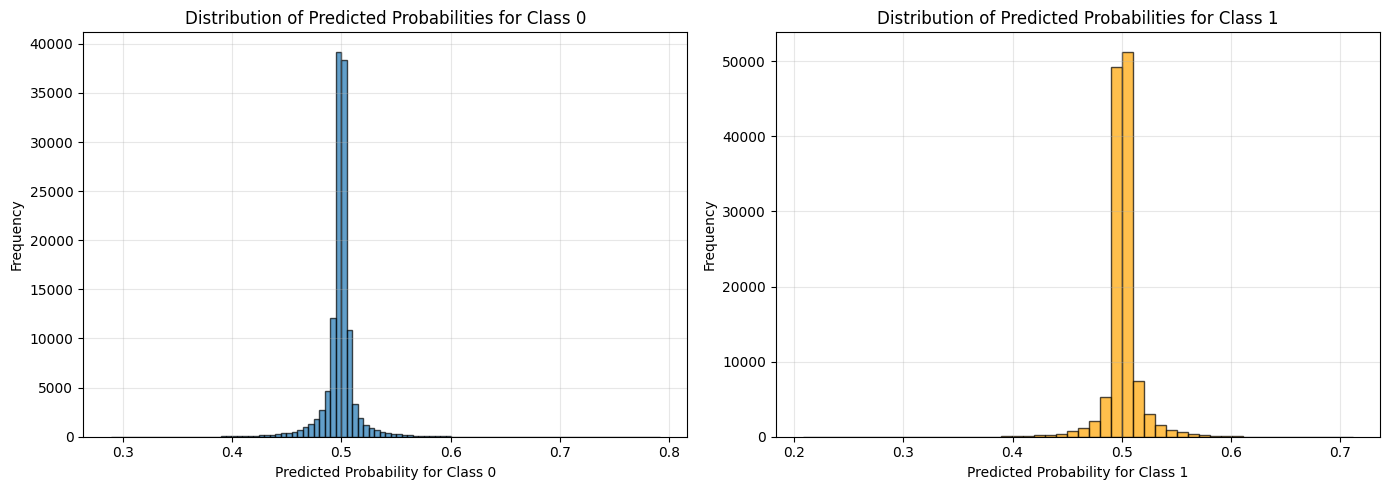

In [58]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Class0 probability distribution
axes[0].hist(results_df['pred_Class0'], bins=100, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Predicted Probability for Class 0')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Predicted Probabilities for Class 0')
axes[0].grid(True, alpha=0.3)

# Plot Class1 probability distribution
axes[1].hist(results_df['pred_Class1'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Predicted Probability for Class 1')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Predicted Probabilities for Class 1')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [59]:
def get_top_flop_k(k: int, data: pd.DataFrame, unique_dates):

    
    top_stocks_by_date = {}

    for date in unique_dates:
        date_data = data[data['date'] == date]
        
        # Top 10 for Class 0 (below median)
        top_class0 = date_data.nlargest(k, 'pred_Class0')[['stock', 'pred_Class0', 'pred_Class1', 'return', 'predicted_class', 'actual_class']]
        
        # Top 10 for Class 1 (above median)
        top_class1 = date_data.nlargest(k, 'pred_Class1')[['stock', 'pred_Class1', 'pred_Class0', 'return', 'predicted_class', 'actual_class']]
        
        top_stocks_by_date[date] = {
            'top_class0': top_class0,
            'top_class1': top_class1
        }

    return top_stocks_by_date


In [60]:
unique_dates = test_metadata['date'].unique()
top_stocks_by_date = get_top_flop_k(10, results_df, unique_dates)
# Display results for a sample of dates
sample_dates = sorted(unique_dates)[:1]  # First date as example

for date in sample_dates:
    print(f"\n{'='*80}")
    print(f"Date: {date}")
    print(f"{'='*80}\n")
    
    print("Top 10 stocks predicted for Class 0 (below median):")
    display(top_stocks_by_date[date]['top_class0'])
    
    print("\nTop 10 stocks predicted for Class 1 (above median):")
    display(top_stocks_by_date[date]['top_class1'])
    print("\n")


Date: 2005-01-03 00:00:00

Top 10 stocks predicted for Class 0 (below median):


,stock,pred_Class0,pred_Class1,return,predicted_class,actual_class
84647,NUE.N,0.560237,0.439763,-1.607328,0,0
6804,AMCC.OQ^A17,0.549837,0.450163,0.393562,0,1
122951,X.N^F25,0.531283,0.468717,-1.700937,0,0
88931,PD.N^C07,0.529034,0.470966,-1.406876,0,0
89687,PFE.N,0.516893,0.483107,-0.741056,0,0
103547,SLR.N^J07,0.516516,0.483484,-1.340113,0,0
110603,THC.N,0.515701,0.484299,-1.101970,0,0
24696,CIEN.N,0.513700,0.486300,-0.285924,0,1
111107,TIN.N^B12,0.512114,0.487887,-0.177165,0,1
3528,ADSK.OQ,0.511795,0.488205,-0.508739,0,1



Top 10 stocks predicted for Class 1 (above median):


,stock,pred_Class1,pred_Class0,return,predicted_class,actual_class
77591,MON.N^F18,0.516231,0.483769,-0.655007,1,0
92207,PMCS.OQ^A16,0.514466,0.485534,-1.621997,1,0
69275,LMT.N,0.514390,0.485610,-1.081450,1,0
84899,NVDA.OQ,0.513151,0.486849,0.069934,1,1
117911,VIAV.OQ,0.511206,0.488794,-0.576784,1,0
83135,NOC.N,0.510459,0.489541,-0.596207,1,0
5292,AGN.N^E20,0.509271,0.490729,-1.239948,1,0
95231,QCOM.OQ,0.509252,0.490748,-0.106010,1,1
3024,ADM.N,0.508807,0.491193,-0.711448,1,0
10584,ATI.N,0.508637,0.491363,-2.513229,1,0


In [61]:
# Calculate metrics for each date
metrics_data = []

for date in unique_dates:
    flop_k = top_stocks_by_date[date]['top_class0']
    avg_return_flop_k = - flop_k['return'].mean()
    accuracy_flop_k = 1 - flop_k['actual_class'].sum()/10
    
    top_k = top_stocks_by_date[date]['top_class1']
    avg_return_top_k = top_k['return'].mean()
    accuracy_top_k = top_k['actual_class'].sum()/10

    overall_return = avg_return_flop_k + avg_return_top_k
    
    metrics_data.append({
        'date': date,
        'avg_return_flop_k': avg_return_flop_k,
        'accuracy_flop_k': accuracy_flop_k,
        'avg_return_top_k': avg_return_top_k,
        'accuracy_top_k': accuracy_top_k,
        'overall_return': overall_return
    })

metrics_df = pd.DataFrame(metrics_data)
display(metrics_df.head(5))
print(metrics_df.shape)

,date,avg_return_flop_k,accuracy_flop_k,avg_return_top_k,accuracy_top_k,overall_return
0,2005-01-03,0.847655,0.6,-0.903215,0.2,-0.055560
1,2005-01-04,0.969493,0.4,-1.185411,0.3,-0.215918
2,2005-01-05,0.559270,0.9,0.072502,0.4,0.631773
3,2005-01-06,0.219243,0.6,0.134607,0.5,0.353850
4,2005-01-07,0.320824,0.7,0.180938,0.8,0.501762


(252, 6)


One big issue that I see with this trading strategy / classification based on median returns is the fact that even if the model predicts the wrong class it could still be worthwhile to use the models prediction to make money.

- 1st: it incentivizes the model to learn the classes although predicting the wrong class could be profitable
- 2nd: accuracy might be a flawed metric (but then maybe its a feature not a bug?!)

In [62]:
metrics_df['overall_return'].mean()

np.float64(0.16886016767391104)